In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, Lambda, concatenate, Conv2D, MaxPooling2D, Dropout, Flatten

import matplotlib.pyplot as plt



In [ ]:
#MAPE
#from sklearn.metrics import mean_absolute_percentage_error
#mean_absolute_percentage_error(y_true, y_pred)

In [2]:
dataframe = pd.read_csv('database_CMD_labled5.csv',header = None)
dataframe.head()
#dataframe.tail()

,0,1,2,3,4,5,6,7,8,9,...,398,399,400,401,402,403,404,405,406,407
0,-0.25054,-0.25452,-0.25182,-0.24672,-0.23582,-0.23128,-0.22481,-0.21844,-0.20681,-0.18447,...,-0.028027,-0.037409,1.00000,-1.626300e-17,8.708800e-18,1.00000,1.851600e-18,-1.649900e-19,1,1
1,-0.25054,-0.25452,-0.25182,-0.24672,-0.23582,-0.23128,-0.22481,-0.21844,-0.20681,-0.18447,...,-0.239480,-0.252440,0.51158,-9.431300e-01,9.702200e-01,0.26514,-8.308300e-03,3.709900e-03,2,1
2,-0.25054,-0.25452,-0.25182,-0.24672,-0.23582,-0.23128,-0.22481,-0.21844,-0.20681,-0.18447,...,0.018412,0.012219,0.75466,3.420300e-01,-2.058500e-01,1.12690,-8.519700e-03,6.950200e-04,3,1
3,-0.25054,-0.25452,-0.25182,-0.24672,-0.23582,-0.23128,-0.22481,-0.21844,-0.20681,-0.18447,...,-0.117880,-0.122010,-0.70328,-1.337600e+00,4.517900e-01,-0.43575,-7.556800e-03,-4.291600e-04,4,1
4,-0.25054,-0.25452,-0.25182,-0.24672,-0.23582,-0.23128,-0.22481,-0.21844,-0.20681,-0.18447,...,0.111730,0.132450,-0.29797,9.285400e-01,-4.115300e-01,-1.37040,2.115900e-03,-5.808900e-03,5,1


In [3]:
print(dataframe)

          0        1        2        3        4        5        6        7    \
0    -0.25054 -0.25452 -0.25182 -0.24672 -0.23582 -0.23128 -0.22481 -0.21844   
1    -0.25054 -0.25452 -0.25182 -0.24672 -0.23582 -0.23128 -0.22481 -0.21844   
2    -0.25054 -0.25452 -0.25182 -0.24672 -0.23582 -0.23128 -0.22481 -0.21844   
3    -0.25054 -0.25452 -0.25182 -0.24672 -0.23582 -0.23128 -0.22481 -0.21844   
4    -0.25054 -0.25452 -0.25182 -0.24672 -0.23582 -0.23128 -0.22481 -0.21844   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7835 -0.23812 -0.23061 -0.22156 -0.20138 -0.18627 -0.17305 -0.16373 -0.14795   
7836 -0.23812 -0.23061 -0.22156 -0.20138 -0.18627 -0.17305 -0.16373 -0.14795   
7837 -0.23812 -0.23061 -0.22156 -0.20138 -0.18627 -0.17305 -0.16373 -0.14795   
7838 -0.23812 -0.23061 -0.22156 -0.20138 -0.18627 -0.17305 -0.16373 -0.14795   
7839 -0.23812 -0.23061 -0.22156 -0.20138 -0.18627 -0.17305 -0.16373 -0.14795   

          8        9    ...       398  

In [4]:

dataframe = pd.DataFrame(dataframe).to_numpy()
print(dataframe.shape)
print(dataframe)


(7840, 408)
[[-2.5054e-01 -2.5452e-01 -2.5182e-01 ... -1.6499e-19  1.0000e+00
   1.0000e+00]
 [-2.5054e-01 -2.5452e-01 -2.5182e-01 ...  3.7099e-03  2.0000e+00
   1.0000e+00]
 [-2.5054e-01 -2.5452e-01 -2.5182e-01 ...  6.9502e-04  3.0000e+00
   1.0000e+00]
 ...
 [-2.3812e-01 -2.3061e-01 -2.2156e-01 ...  5.5710e-03  7.8380e+03
   4.0000e+01]
 [-2.3812e-01 -2.3061e-01 -2.2156e-01 ... -6.3346e-03  7.8390e+03
   4.0000e+01]
 [-2.3812e-01 -2.3061e-01 -2.2156e-01 ... -6.1071e-19  7.8400e+03
   4.0000e+01]]


In [5]:
import random
random.shuffle(dataframe)
print(dataframe.shape)

(7840, 408)


In [6]:
Current_contours=dataframe[:,0:200]
#print(contours[1,0:200])
print(Current_contours.shape)
post_Contours=dataframe[:,200:400]
print(post_Contours.shape)

(7840, 200)
(7840, 200)


In [7]:
Transformation_matrix=dataframe[:,400:406]
print(Transformation_matrix[0,:])
print(Transformation_matrix.shape)

[ 1.0000e+00 -1.6263e-17  8.7088e-18  1.0000e+00  1.8516e-18 -1.6499e-19]
(7840, 6)


In [8]:
#print classes and subclasses\n",
Subclass_class=dataframe[:,406:408]
print(Subclass_class.astype("int"))

[[   1    1]
 [   1    1]
 [   3    1]
 ...
 [5494   29]
 [7825   40]
 [1521    8]]


In [9]:
Reshape_CurreCon = Current_contours.reshape((Current_contours.shape[0], 2,100,1))
print(Reshape_CurreCon.shape)
Reshape_PostCon = post_Contours.reshape((post_Contours.shape[0], 2,100,1))
print(Reshape_PostCon.shape)


(7840, 2, 100, 1)
(7840, 2, 100, 1)


In [10]:
train_size = int(Reshape_CurreCon.shape[0] * 0.75)
print(train_size)
test_size = int(Reshape_CurreCon.shape[0] * 0.25)
print(test_size)

5880
1960


In [11]:
data_left_train = Reshape_CurreCon[:train_size]
data_right_train = Reshape_PostCon[:train_size]
affine_matrices_train = Transformation_matrix[:train_size]

In [12]:
data_left_test = Reshape_CurreCon[-test_size:]
data_right_test = Reshape_PostCon[-test_size:]
affine_matrices_test = Transformation_matrix[-test_size:]

In [13]:

import tensorflow.keras.backend as K
shape= (2,100,1) 
#Les entrées des deux modele siamese
print("[INFO] building siamese network...")
input_1 =tf.keras.layers.Input(shape) 
input_2 =tf.keras.layers.Input(shape)
## Définir le modèle siamese profond
model =keras.Sequential()
# Ajout de couches de convolution et de pooling
model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',  padding='same', input_shape=shape, name="Conv2D_1"))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',  padding='same', name="Conv2D_2"))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',  padding='same', name="Conv2D_3"))
model.add(keras.layers.MaxPooling2D(pool_size=(1,1), name="MaxPooling2D_1"))


# Conversion en vecteur et ajout de couches fully-connected

model.add(keras.layers.Flatten())
# Appliquer le modèle sur chaque entrée
# As mentioned above, Siamese Network share weights between  tower networks (sister networks).
#To allow this, we will use same embedding network for both tower networks.
tower_1 = model(input_1) #siamese 1
tower_2 = model(input_2) #siamese 2

 # Concatenate the encoded inputs
    # Application de la fonction de distance L2 aux sorties de chaque branche
#concatenated = Lambda(euclidean_distance)([tower_1, tower_2])
concatenated = concatenate([tower_1, tower_2])

# Fully connected layers for prediction !!!!!!! fxer le nombre des noeuds
fc = Dense(50, activation='relu')(concatenated)
fc = Dense(50, activation='relu')(fc)
fc = Dense(50, activation='relu')(fc)
# Output layer for the affine transformation matrix
output = Dense(6, activation='linear')(fc)
    
siamese_net =keras.Model(inputs=[input_1,input_2],outputs=output)



[INFO] building siamese network...


In [14]:
from keras.optimizers import Adam
mse_values = []  # List to store MSE values
mae_values = []  # List to store MAE values
accuracy_values = []  # List to store accuracy values

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for lr in learning_rates:
    print(lr)
    # Définition de l'optimizer Adam avec le learning rate correspondant
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    print("[INFO] compiling model...")
    # Compilation du modèle avec l'optimizer et les métriques
    siamese_net.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae','accuracy'])

    # Entraînement du modèle
    print("[INFO] training model...")
    history = siamese_net.fit([data_left_train, data_right_train], affine_matrices_train,
                              batch_size=64, epochs=150,
                              validation_data=([data_left_test, data_right_test], affine_matrices_test))

    # Évaluation du modèle sur les données de test
    print("[INFO] evaluate the model...")
    loss = siamese_net.evaluate([data_left_test, data_right_test], affine_matrices_test)
    print("[INFO] making predictions on test data...")
    # Effectuer des prédictions sur les données de test
    predictions = siamese_net.predict([data_left_test, data_right_test])

    # Calculer MSE et MAE en comparant les prédictions avec les valeurs réelles
    mse_value = np.mean((predictions - affine_matrices_test)**2)
    mae_value = np.mean(np.abs(predictions - affine_matrices_test))
 
    
    # Store the values in the corresponding lists
    mse_values.append(mse_value)
    mae_values.append(mae_value)
    
    
    

0.1
[INFO] compiling model...
[INFO] training model...
Epoch 1/150
92/92 [==============================] - 9s 89ms/step - loss: 0.4878 - mse: 0.4878 - mae: 0.4609 - accuracy: 0.4122 - val_loss: 0.3722 - val_mse: 0.3722 - val_mae: 0.3989 - val_accuracy: 0.5689
Epoch 2/150
92/92 [==============================] - 8s 91ms/step - loss: 0.2793 - mse: 0.2793 - mae: 0.3347 - accuracy: 0.6556 - val_loss: 0.2468 - val_mse: 0.2468 - val_mae: 0.3033 - val_accuracy: 0.6801
Epoch 3/150
92/92 [==============================] - 8s 89ms/step - loss: 0.1971 - mse: 0.1971 - mae: 0.2735 - accuracy: 0.7119 - val_loss: 0.2124 - val_mse: 0.2124 - val_mae: 0.2783 - val_accuracy: 0.7010
Epoch 4/150
92/92 [==============================] - 8s 92ms/step - loss: 0.1576 - mse: 0.1576 - mae: 0.2431 - accuracy: 0.7512 - val_loss: 0.1828 - val_mse: 0.1828 - val_mae: 0.2553 - val_accuracy: 0.7107
Epoch 5/150
92/92 [==============================] - 9s 94ms/step - loss: 0.1278 - mse: 0.1278 - mae: 0.2187 - accuracy: 

Epoch 80/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0511 - accuracy: 0.9075 - val_loss: 0.0747 - val_mse: 0.0747 - val_mae: 0.1426 - val_accuracy: 0.8199
Epoch 81/150
92/92 [==============================] - 8s 84ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0515 - accuracy: 0.9034 - val_loss: 0.0733 - val_mse: 0.0733 - val_mae: 0.1404 - val_accuracy: 0.8321
Epoch 82/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0487 - accuracy: 0.9092 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.1412 - val_accuracy: 0.8235
Epoch 83/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0495 - accuracy: 0.9071 - val_loss: 0.0742 - val_mse: 0.0742 - val_mae: 0.1403 - val_accuracy: 0.8219
Epoch 84/150
92/92 [==============================] - 8s 87ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0485 - accuracy: 0.9090 - val_loss: 0.0759 - val_mse: 0.0759 - val_

[INFO] compiling model...
[INFO] training model...
Epoch 1/150
92/92 [==============================] - 10s 99ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0420 - accuracy: 0.9153 - val_loss: 0.0733 - val_mse: 0.0733 - val_mae: 0.1361 - val_accuracy: 0.8240
Epoch 2/150
92/92 [==============================] - 10s 104ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0375 - accuracy: 0.9119 - val_loss: 0.0733 - val_mse: 0.0733 - val_mae: 0.1374 - val_accuracy: 0.8224
Epoch 3/150
92/92 [==============================] - 9s 93ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0382 - accuracy: 0.9160 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.1363 - val_accuracy: 0.8265
Epoch 4/150
92/92 [==============================] - 8s 90ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0399 - accuracy: 0.9158 - val_loss: 0.0748 - val_mse: 0.0748 - val_mae: 0.1383 - val_accuracy: 0.8189
Epoch 5/150
92/92 [==============================] - 9s 93ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0407 - accuracy: 0

Epoch 80/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0319 - accuracy: 0.9180 - val_loss: 0.0730 - val_mse: 0.0730 - val_mae: 0.1323 - val_accuracy: 0.8189
Epoch 81/150
92/92 [==============================] - 8s 89ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0335 - accuracy: 0.9224 - val_loss: 0.0723 - val_mse: 0.0723 - val_mae: 0.1342 - val_accuracy: 0.8357
Epoch 82/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0353 - accuracy: 0.9196 - val_loss: 0.0723 - val_mse: 0.0723 - val_mae: 0.1334 - val_accuracy: 0.8199
Epoch 83/150
92/92 [==============================] - 8s 89ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0336 - accuracy: 0.9192 - val_loss: 0.0723 - val_mse: 0.0723 - val_mae: 0.1325 - val_accuracy: 0.8209
Epoch 84/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0304 - accuracy: 0.9192 - val_loss: 0.0722 - val_mse: 0.0722 - val_

[INFO] compiling model...
[INFO] training model...
Epoch 1/150
92/92 [==============================] - 9s 88ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0330 - accuracy: 0.9259 - val_loss: 0.0709 - val_mse: 0.0709 - val_mae: 0.1304 - val_accuracy: 0.8337
Epoch 2/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0267 - accuracy: 0.9272 - val_loss: 0.0711 - val_mse: 0.0711 - val_mae: 0.1291 - val_accuracy: 0.8235
Epoch 3/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0262 - accuracy: 0.9233 - val_loss: 0.0718 - val_mse: 0.0718 - val_mae: 0.1311 - val_accuracy: 0.8240
Epoch 4/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0315 - accuracy: 0.9240 - val_loss: 0.0711 - val_mse: 0.0711 - val_mae: 0.1317 - val_accuracy: 0.8260
Epoch 5/150
92/92 [==============================] - 8s 87ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0332 - accuracy: 0.92

Epoch 80/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0260 - accuracy: 0.9233 - val_loss: 0.0717 - val_mse: 0.0717 - val_mae: 0.1298 - val_accuracy: 0.8224
Epoch 81/150
92/92 [==============================] - 8s 88ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0262 - accuracy: 0.9241 - val_loss: 0.0713 - val_mse: 0.0713 - val_mae: 0.1295 - val_accuracy: 0.8240
Epoch 82/150
92/92 [==============================] - 8s 91ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0262 - accuracy: 0.9248 - val_loss: 0.0709 - val_mse: 0.0709 - val_mae: 0.1285 - val_accuracy: 0.8250
Epoch 83/150
92/92 [==============================] - 8s 89ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0281 - accuracy: 0.9259 - val_loss: 0.0708 - val_mse: 0.0708 - val_mae: 0.1291 - val_accuracy: 0.8209
Epoch 84/150
92/92 [==============================] - 8s 87ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0289 - accuracy: 0.9255 - val_loss: 0.0716 - val_mse: 0.0716 - val_

0.0001
[INFO] compiling model...
[INFO] training model...
Epoch 1/150
92/92 [==============================] - 11s 108ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0276 - accuracy: 0.9216 - val_loss: 0.0704 - val_mse: 0.0704 - val_mae: 0.1272 - val_accuracy: 0.8311
Epoch 2/150
92/92 [==============================] - 10s 109ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0216 - accuracy: 0.9281 - val_loss: 0.0702 - val_mse: 0.0702 - val_mae: 0.1266 - val_accuracy: 0.8240
Epoch 3/150
92/92 [==============================] - 9s 101ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0226 - accuracy: 0.9291 - val_loss: 0.0705 - val_mse: 0.0705 - val_mae: 0.1274 - val_accuracy: 0.8189
Epoch 4/150
92/92 [==============================] - 8s 92ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0252 - accuracy: 0.9311 - val_loss: 0.0716 - val_mse: 0.0716 - val_mae: 0.1299 - val_accuracy: 0.8362
Epoch 5/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0268 - ac

Epoch 80/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0238 - accuracy: 0.9262 - val_loss: 0.0694 - val_mse: 0.0694 - val_mae: 0.1278 - val_accuracy: 0.8321
Epoch 81/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0242 - accuracy: 0.9253 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.1272 - val_accuracy: 0.8260
Epoch 82/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0232 - accuracy: 0.9269 - val_loss: 0.0700 - val_mse: 0.0700 - val_mae: 0.1269 - val_accuracy: 0.8321
Epoch 83/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0248 - accuracy: 0.9257 - val_loss: 0.0693 - val_mse: 0.0693 - val_mae: 0.1280 - val_accuracy: 0.8194
Epoch 84/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0270 - accuracy: 0.9289 - val_loss: 0.0711 - val_mse: 0.0711 - val_

[INFO] compiling model...
[INFO] training model...
Epoch 1/150
92/92 [==============================] - 9s 87ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0243 - accuracy: 0.9282 - val_loss: 0.0686 - val_mse: 0.0686 - val_mae: 0.1253 - val_accuracy: 0.8337
Epoch 2/150
92/92 [==============================] - 8s 86ms/step - loss: 8.9730e-04 - mse: 8.9730e-04 - mae: 0.0202 - accuracy: 0.9301 - val_loss: 0.0695 - val_mse: 0.0695 - val_mae: 0.1260 - val_accuracy: 0.8311
Epoch 3/150
92/92 [==============================] - 8s 86ms/step - loss: 8.8885e-04 - mse: 8.8885e-04 - mae: 0.0201 - accuracy: 0.9281 - val_loss: 0.0687 - val_mse: 0.0687 - val_mae: 0.1252 - val_accuracy: 0.8347
Epoch 4/150
92/92 [==============================] - 8s 86ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0231 - accuracy: 0.9313 - val_loss: 0.0691 - val_mse: 0.0691 - val_mae: 0.1265 - val_accuracy: 0.8281
Epoch 5/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0243 

92/92 [==============================] - 10s 107ms/step - loss: 8.5427e-04 - mse: 8.5427e-04 - mae: 0.0199 - accuracy: 0.9321 - val_loss: 0.0683 - val_mse: 0.0683 - val_mae: 0.1247 - val_accuracy: 0.8296
Epoch 80/150
92/92 [==============================] - 8s 92ms/step - loss: 8.2914e-04 - mse: 8.2914e-04 - mae: 0.0196 - accuracy: 0.9298 - val_loss: 0.0684 - val_mse: 0.0684 - val_mae: 0.1259 - val_accuracy: 0.8255
Epoch 81/150
92/92 [==============================] - 8s 91ms/step - loss: 9.1070e-04 - mse: 9.1070e-04 - mae: 0.0205 - accuracy: 0.9289 - val_loss: 0.0686 - val_mse: 0.0686 - val_mae: 0.1263 - val_accuracy: 0.8209
Epoch 82/150
92/92 [==============================] - 8s 92ms/step - loss: 8.7283e-04 - mse: 8.7283e-04 - mae: 0.0202 - accuracy: 0.9303 - val_loss: 0.0684 - val_mse: 0.0684 - val_mae: 0.1250 - val_accuracy: 0.8337
Epoch 83/150
92/92 [==============================] - 8s 92ms/step - loss: 8.9537e-04 - mse: 8.9537e-04 - mae: 0.0204 - accuracy: 0.9342 - val_loss: 0.

Epoch 118/150
92/92 [==============================] - 8s 90ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0223 - accuracy: 0.9313 - val_loss: 0.0685 - val_mse: 0.0685 - val_mae: 0.1268 - val_accuracy: 0.8301
Epoch 119/150
92/92 [==============================] - 8s 86ms/step - loss: 9.8289e-04 - mse: 9.8289e-04 - mae: 0.0212 - accuracy: 0.9316 - val_loss: 0.0691 - val_mse: 0.0691 - val_mae: 0.1263 - val_accuracy: 0.8413
Epoch 120/150
92/92 [==============================] - 8s 85ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0214 - accuracy: 0.9247 - val_loss: 0.0683 - val_mse: 0.0683 - val_mae: 0.1268 - val_accuracy: 0.8393
Epoch 121/150
92/92 [==============================] - 8s 85ms/step - loss: 9.0573e-04 - mse: 9.0573e-04 - mae: 0.0205 - accuracy: 0.9357 - val_loss: 0.0684 - val_mse: 0.0684 - val_mae: 0.1261 - val_accuracy: 0.8372
Epoch 122/150
92/92 [==============================] - 8s 86ms/step - loss: 8.9554e-04 - mse: 8.9554e-04 - mae: 0.0204 - accuracy: 0.9323 - val_loss: 0.

mse [0.07394956166519503, 0.07115902991887836, 0.07053774268623336, 0.06888329674711749, 0.06846209641320701]
mae [0.13704974885265428, 0.12913200121392843, 0.12831195834889902, 0.12681341796952864, 0.12436061839688178]
learning rates [0.1, 0.01, 0.001, 0.0001, 1e-05]


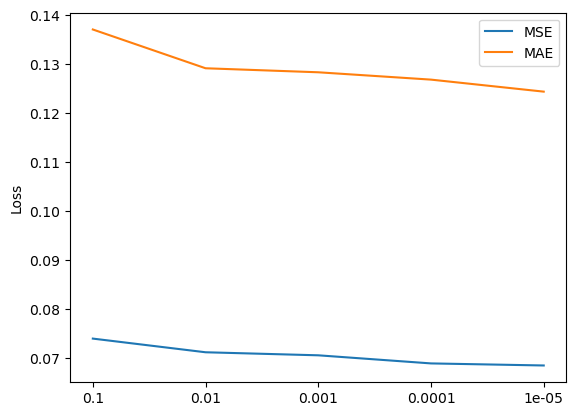

In [44]:
# Tracé de la courbe
print('mse', mse_values)
print('mae', mae_values)
print('learning rates', learning_rates)
plt.plot(range(len(learning_rates)), mse_values, label='MSE')
plt.plot(range(len(learning_rates)), mae_values, label='MAE')
#plt.plot(range(len(learning_rates)), accuracy_values, label='Accuracy')
plt.title('')
plt.xticks(range(len(learning_rates)), learning_rates)
plt.ylabel('Loss')
plt.legend()

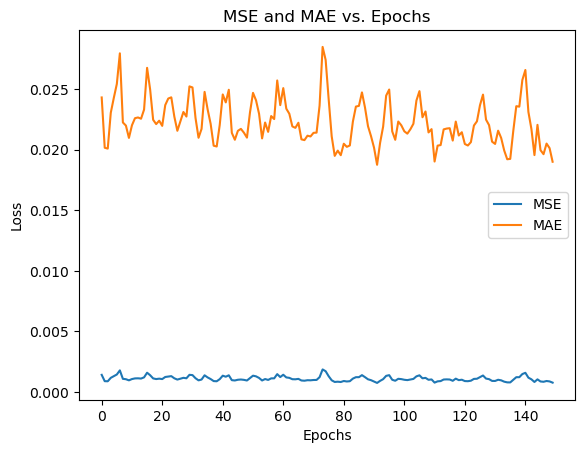

In [21]:

# Récupération des historiques de MSE et MAE
mse_history = history.history['mse']
mae_history = history.history['mae']
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

  # Affichage des courbes de MSE et MAE
plt.plot(mse_history, label='MSE')
plt.plot(mae_history, label='MAE')
#plt.plot(learning_rates, label='Learning Rate')

# Configuration du graphique
plt.title('MSE and MAE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Affichage du graphique
plt.show()



In [25]:
predictions = siamese_net.predict([data_left_test, data_right_test])
mae = tf.keras.metrics.mean_absolute_error(affine_matrices_test, predictions).numpy()

print(f"Learning rate: {lr} - Test loss: {loss} - MAE: {mae}")


62/62 [==============================] - 1s 12ms/step
Learning rate: 1e-05 - Test loss: [0.06846208870410919, 0.06846208870410919, 0.12436061352491379, 0.8321428298950195] - MAE: [0.01562436 0.21586357 0.1059289  ... 0.15526561 0.17334127 0.08991613]


In [26]:
from sklearn.metrics import mean_squared_error
#MSE mesure également la précision des prévisions en indiquant la moyenne des erreurs 
#au carré entre les valeurs prédites et les valeurs réelles.
# Calculer la MSE entre les matrices prédites et réelles
mse = mean_squared_error(affine_matrices_test, predictions)
print("Mean Squared Error : ", mse)

Mean Squared Error :  0.06846209641320704


In [27]:
from sklearn.metrics import mean_absolute_error
#MAE mesure la précision des prévisions en indiquant la moyenne des erreurs absolues
#entre les valeurs prédites et les valeurs réelles.
# calculate mean absolute error
mae = mean_absolute_error(affine_matrices_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.1243606183968819


In [28]:
real_values = affine_matrices_test

distances = []
for i in range(len(predictions)):
    dist = np.linalg.norm(real_values[i]- predictions[i])
    distances.append(dist)

mean_distance = np.mean(distances)
print("Mean Euclidean Distance: ", mean_distance)



Mean Euclidean Distance:  0.4346710024375088


In [29]:
# Afficher la matrice de transformation prédite
print(predictions.shape)
print(predictions[:,:])
predictions_Re=predictions.reshape(predictions.shape[0],2,3)
print(predictions_Re)

(1960, 6)
[[ 9.1537046e-01  2.8839704e-01  1.3621539e+00 -1.1000314e+00
   8.2411000e-04 -6.7845881e-03]
 [ 1.5750685e+00 -1.5677160e-01 -3.8772953e-01 -8.2866675e-01
   1.6164545e-03 -2.6621018e-03]
 [-1.1651886e+00 -4.5079991e-01  1.0728030e+00 -5.2361882e-01
   3.5779269e-03 -5.9656203e-03]
 ...
 [-2.2642380e-01  7.5078189e-01 -1.3072546e+00 -1.4041397e-01
   1.7100798e-03 -1.9315409e-03]
 [ 7.4269527e-01  1.8580839e-01 -3.8940075e-01  1.1998153e+00
  -9.8488294e-04 -6.7335642e-03]
 [ 2.9230330e+00  4.5364599e+00 -8.3517540e-01 -8.8724148e-01
   1.9350020e-02 -1.0600028e-02]]
[[[ 9.1537046e-01  2.8839704e-01  1.3621539e+00]
  [-1.1000314e+00  8.2411000e-04 -6.7845881e-03]]

 [[ 1.5750685e+00 -1.5677160e-01 -3.8772953e-01]
  [-8.2866675e-01  1.6164545e-03 -2.6621018e-03]]

 [[-1.1651886e+00 -4.5079991e-01  1.0728030e+00]
  [-5.2361882e-01  3.5779269e-03 -5.9656203e-03]]

 ...

 [[-2.2642380e-01  7.5078189e-01 -1.3072546e+00]
  [-1.4041397e-01  1.7100798e-03 -1.9315409e-03]]

 [[ 7.42

In [30]:

print(predictions[101,:])
print(predictions[101,0])
print(predictions[101,1])
print(predictions[101,2])
print(predictions[101,3])
print(predictions[101,4])
print(predictions[101,5])

[-1.1201186   0.65032333 -0.49730304 -0.5449928   0.00521604 -0.00296922]
-1.1201186
0.65032333
-0.49730304
-0.5449928
0.005216036
-0.002969217


In [31]:
print(siamese_net.optimizer.get_config())

{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [32]:
###TEST###
c=3
#Définir la matrice de transformation
transformation_matrix =predictions[c,:]
print(transformation_matrix)
print(affine_matrices_test[c,:])
#transformation_matrix = transformation_matrix.reshape(6, 1)
# Définir le point à transformer
 
x11=data_left_test[c,0]
x12=data_left_test[c,1]
print(x11)
x21=data_right_test[c,0]
x22=data_right_test[c,1]
Hx=x11*transformation_matrix[0]+x12*transformation_matrix[2]+transformation_matrix[4]
Hy=x11*transformation_matrix[1]+x12*transformation_matrix[3]+transformation_matrix[5]
print(Hx.shape)
print(Hy.shape)


[-1.0099466e+00  1.6404505e-01  2.4884322e-01  9.2241460e-01
  5.6529068e-04 -6.9060489e-03]
[-1.0568    0.22234   0.3072    0.94424   0.002836 -0.002207]
[[-0.064075 ]
 [-0.072945 ]
 [-0.0821   ]
 [-0.089388 ]
 [-0.09383  ]
 [-0.099825 ]
 [-0.10807  ]
 [-0.10958  ]
 [-0.11019  ]
 [-0.11471  ]
 [-0.11963  ]
 [-0.12063  ]
 [-0.12258  ]
 [-0.12209  ]
 [-0.11868  ]
 [-0.11074  ]
 [-0.10178  ]
 [-0.090751 ]
 [-0.077789 ]
 [-0.065592 ]
 [-0.053666 ]
 [-0.05559  ]
 [-0.060824 ]
 [-0.066905 ]
 [-0.080812 ]
 [-0.070432 ]
 [-0.050234 ]
 [-0.04197  ]
 [-0.048202 ]
 [-0.043562 ]
 [-0.03286  ]
 [-0.027427 ]
 [-0.025144 ]
 [-0.0087923]
 [-0.0077497]
 [-0.015685 ]
 [-0.029642 ]
 [-0.036063 ]
 [-0.029947 ]
 [-0.015448 ]
 [-0.0035653]
 [ 0.0049749]
 [ 0.0080351]
 [ 0.0031585]
 [ 0.004311 ]
 [ 0.0096421]
 [ 0.017473 ]
 [ 0.030464 ]
 [ 0.042386 ]
 [ 0.051468 ]
 [ 0.056798 ]
 [ 0.063965 ]
 [ 0.066705 ]
 [ 0.07683  ]
 [ 0.081929 ]
 [ 0.090808 ]
 [ 0.095077 ]
 [ 0.091887 ]
 [ 0.09935  ]
 [ 0.10691  ]
 [ 0.

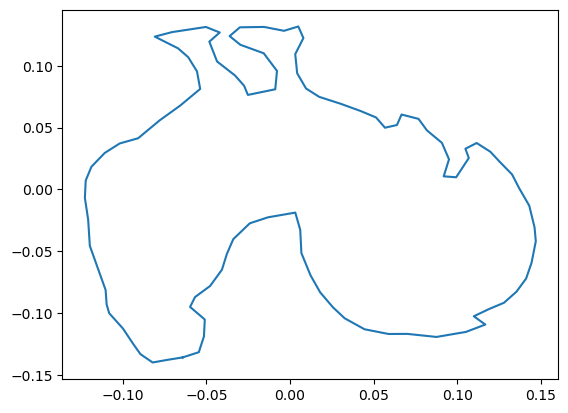

In [36]:
plt.plot(x11,x12,label=" original  shape")


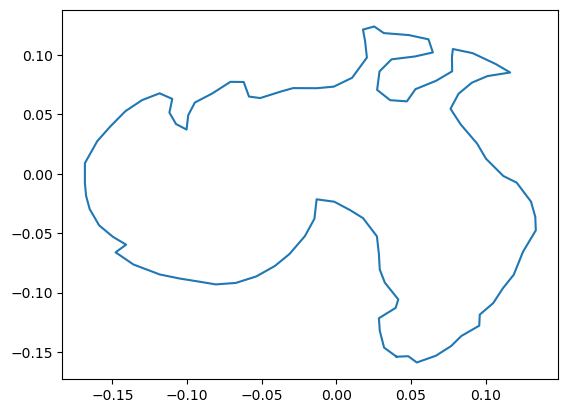

In [37]:
plt.plot(x21,x22,label="cible shape ")

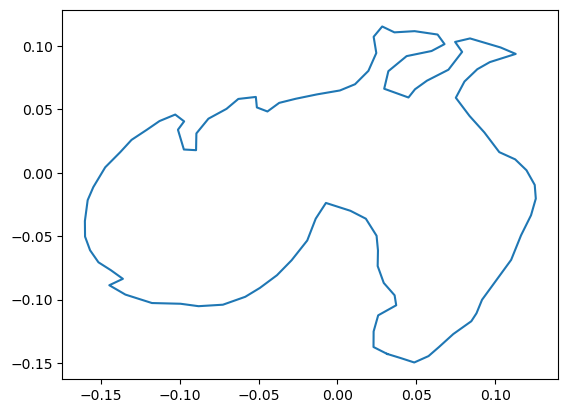

In [38]:
plt.plot(Hx,Hy,label=" transformed shape")

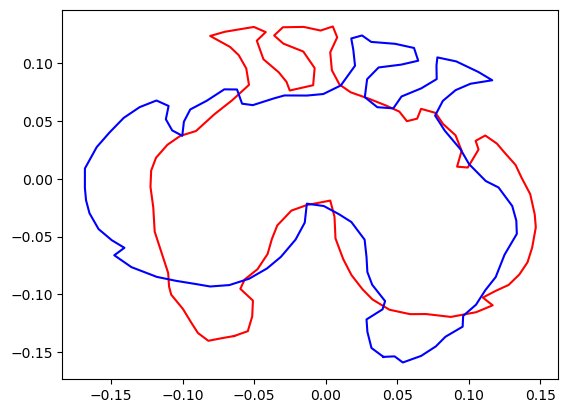

In [34]:

plt.plot(x11,x12,label=" original  shape",c='r')
plt.plot(x21,x22,label="cible shape ",c='b')

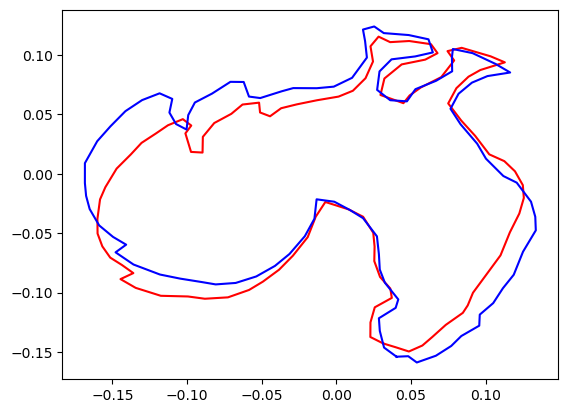

In [39]:
plt.plot(Hx,Hy,label=" transformed shape",c='r')
plt.plot(x21,x22,label="cible shape ",c='b')


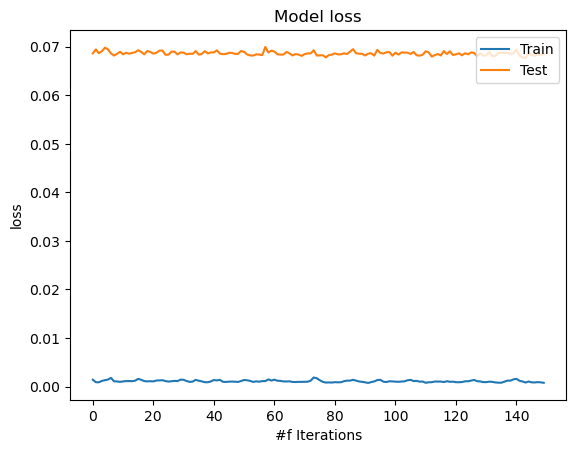

In [40]:
#Let's plot the curves for study
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


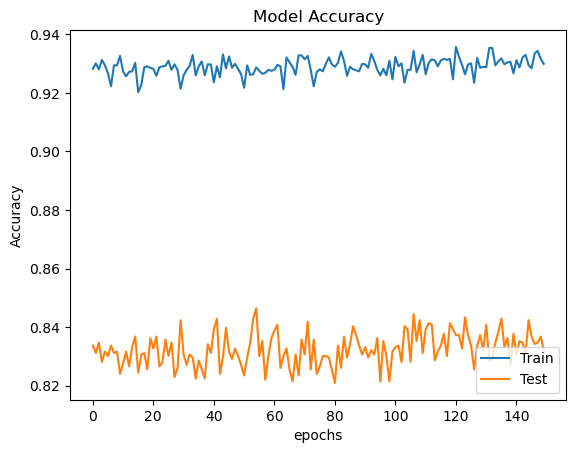

In [41]:
#Let's plot the curves for study
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()